<a href="https://colab.research.google.com/github/dudamesdc/classificacao_dados/blob/main/ml_classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##
PROJETO DE CLASSIFICAÇÃO DE DADOS COM MACHINE LEARNING E PYTHON


In [ ]:
import pandas as pd

dados = pd.read_csv('/content/marketing_investimento.csv')
dados

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [ ]:
dados.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


Esses dados em específico não precisam de tratamento por não ter nenhum campo em branco.
É preciso analisar os dados para que não seja passado nenhum erro para o treinamento.

In [ ]:
import plotly.express as px
#grafico das variáveis categóricas(textuais)
#primeiro vai ser feito um histograma para fazer a contagem e mostrar as categorias.
px.histogram(dados,x='aderencia_investimento', text_auto=True)

In [ ]:
#os outros histogramas vão ser baseados na aderencia por ser a variavel alvo.
px.histogram(dados,x='estado_civil', text_auto=True,color='aderencia_investimento',barmode='group')

In [ ]:
px.histogram(dados,x='escolaridade', text_auto=True,color='aderencia_investimento',barmode='group')

In [ ]:
px.histogram(dados,x='inadimplencia', text_auto=True,color='aderencia_investimento',barmode='group')

In [ ]:
px.histogram(dados,x='fez_emprestimo', text_auto=True,color='aderencia_investimento',barmode='group')

In [ ]:
#explorando agora as variáveis numéricas,usando o boxplot para visualizar a distribuição.
px.box(dados,x='idade',color='aderencia_investimento')

In [ ]:
px.box(dados,x='saldo',color='aderencia_investimento')

In [ ]:
px.box(dados,x='tempo_ult_contato',color='aderencia_investimento')

In [ ]:
px.box(dados,x='numero_contatos',color='aderencia_investimento')

In [ ]:
#separação da variavel alvo para as explicativas.
x =dados.drop('aderencia_investimento',axis=1)
y=dados['aderencia_investimento']

In [ ]:
#transformação de variaveis categoricas para numericas para que a máquina possa entender.
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

#armazena primeiro as colunas, porque quando eu fizer modificações na base de dados, eu não perderei essas colunas.
colunas=x.columns


#agora vamos fazer a transformações das colunas.
one_hot=make_column_transformer((OneHotEncoder(drop='if_binary'),
 ['estado_civil','escolaridade','inadimplencia','fez_emprestimo']),
                                remainder='passthrough',
                                sparse_threshold=0)

x=one_hot.fit_transform(x)
x



array([[ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.420e+02,  5.870e+02,
         1.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  1.289e+03,  2.500e+02,
         4.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  3.630e+02,  1.600e+01,
         1.800e+01],
       ...,
       [ 0.000e+00,  0.000e+00,  1.000e+00, ..., -4.770e+02,  1.532e+03,
         2.000e+00],
       [ 1.000e+00,  0.000e+00,  0.000e+00, ...,  2.187e+03,  5.250e+02,
         3.000e+00],
       [ 0.000e+00,  0.000e+00,  1.000e+00, ...,  1.900e+01,  1.100e+02,
         2.000e+00]])

In [ ]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [ ]:
pd.DataFrame(x,columns=one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


foi feita a transformação das colunas e nesse one got foi colocado a condição do if_binary pra dizer que os elementos que só tivessem duas categorias (sim e não) fosse excluido uma coluna pra não ficar duplicado, assim fica uma coluna só quando for sim vai ser 1.0


In [ ]:
#transformando a variavel alvo
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y


array([1, 1, 0, ..., 1, 1, 1])

enfatiza-se que essa variavel alvo só é usada no momento do treinamento, dado que, por ela ser determinante, só vai ser possível saber o resultado dela no futuro, pra dizer se realmente aderiram ou não.


Na modelagem, precisa-se separar uma certa quantidade de dados pra treinamento e outro pra o teste (prova se o treinamento deu certo), dado que, se for usado todos os dados não da pra realizar o teste de forma correta Evitando, assim, o Overfitting(pega mt dado para o treinamento ai o modelo se ajusta além do necessário aos dados e pega até as variações aleatórias dele) e o Underfitting (contrário).


In [ ]:
from sklearn.model_selection import train_test_split

x_treino,x_teste,y_treino,y_teste =train_test_split(x,y,stratify=y,random_state=5)

Primeiro vai ser feito um algoritomo (modelo dummy) simples baseado na resposta mais frequente do algoritmo-alvo que nesse caso é o não e mesmo ele não sendo útil para ser usado no futuro, ele vai servir de base para algoritmos mais complexos. Assim, ele estabelece um desenpenho mínimo que os modelos avançados devem superar.

In [ ]:
from sklearn.dummy import DummyClassifier
modelo_dummy=DummyClassifier(strategy='most_frequent')
modelo_dummy.fit(x_treino,y_treino)#aprende o padrão e faz o ajuste
modelo_dummy.score(x_teste,y_teste)#avalia o ajuste

0.6025236593059937

##MODELO ARVORE DE DECISÃO



In [ ]:
#algoritmo de árvore de decisão

from sklearn.tree import DecisionTreeClassifier
arvore= DecisionTreeClassifier(random_state=5)
arvore.fit(x_treino,y_treino)

arvore.predict(x_teste)


array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [ ]:
arvore.score(x_teste,y_teste)

0.6656151419558359

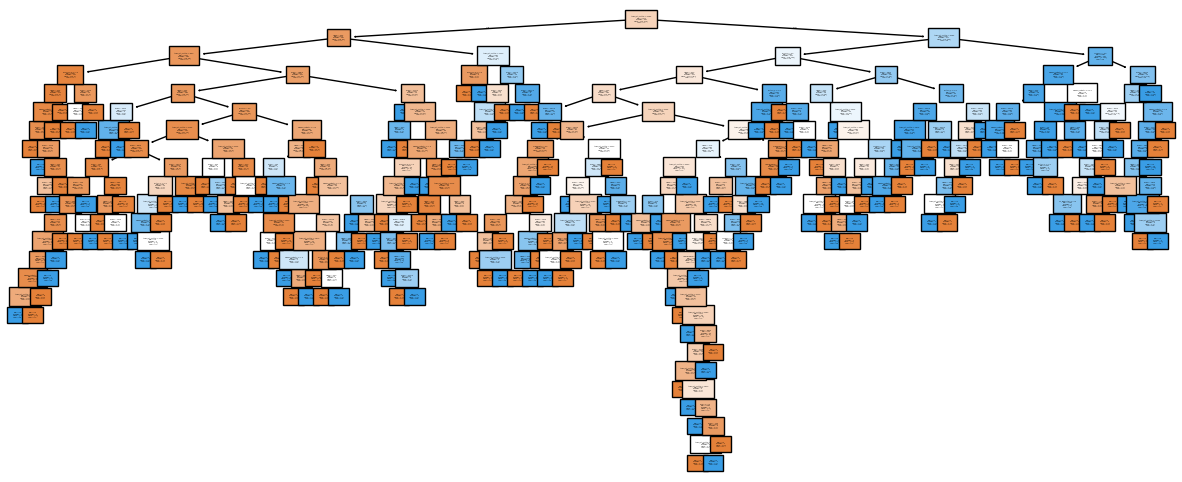

In [ ]:
#vizualizar as decisões feita pela arvore
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
nome_colunas=['casado(a)',
              'divorciado(a)',
              'solterio(a)',
              'fundamental',
              'medio',
              'superior',
              'inadimplencia',
              'faz_emprestimo',
              'idade',
              'saldo',
              'tempo_ult_contato',
              'numero_contatos'

              ]
plt.figure(figsize=(15,6))
plot_tree(arvore,filled=True,class_names=['nao','sim'],fontsize=1,feature_names=nome_colunas);


In [ ]:
arvore.score(x_treino,y_treino)

1.0

o nosso algoritmo esta decorando os dado ao inves de estar aprendendo com eles e ai tem q ser consertado,dado que, está tomando decisões pegando todas as nuances dos dados, então vamos diminuir essas escolhas.

In [ ]:
arvore=DecisionTreeClassifier(max_depth=3,random_state=5)
arvore.fit(x_treino,y_treino)
arvore.score(x_treino,y_treino)

0.7613038906414301

In [ ]:
arvore.score(x_teste,y_teste)

0.7160883280757098

Quando podamos a arvore, ele entende melhor o padrão ao invés de decorar.

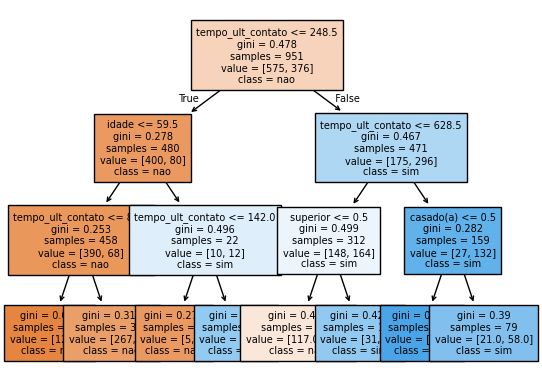

In [ ]:
plot_tree(arvore,filled=True,class_names=['nao','sim'],fontsize=7,feature_names=nome_colunas);


In [ ]:

#normalizando
from sklearn.preprocessing import MinMaxScaler

normalizacao=MinMaxScaler()
x_treino_normalizado=normalizacao.fit_transform(x_treino)
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


##MODELO KNN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier() #por padrão k=3

knn.fit(x_treino_normalizado,y_treino)

x_teste_normalizado=normalizacao.transform(x_teste)
knn.score(x_teste_normalizado,y_teste)


0.6876971608832808

In [ ]:
print(f'Acurácia Dummy:{modelo_dummy.score(x_teste,y_teste)}')
print(f'Acurácia Arvore:{arvore.score(x_teste,y_teste)}')
print(f'Acurácia KNN:{knn.score(x_teste_normalizado,y_teste)}')

Acurácia Dummy:0.6025236593059937
Acurácia Arvore:0.7160883280757098
Acurácia KNN:0.6876971608832808


In [ ]:
import pickle

with open('modelo_onehotenc.pkl','wb') as arquivo:
  pickle.dump(one_hot,arquivo)

In [ ]:
import pickle

with open('modelo_arvore.pkl','wb') as arquivo:
  pickle.dump(arvore,arquivo)

In [ ]:
#exemplo
dados



,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim
...,...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6,sim
1264,35,solteiro (a),superior,nao,5958,nao,215,1,sim
1265,30,solteiro (a),superior,nao,-477,sim,1532,2,sim
1266,42,casado (a),superior,nao,2187,nao,525,3,sim


In [ ]:
novo_dado={
    'idade':[45],
    'estado_civil':['solteiro (a)'],
    'escolaridade':['superior'],
    'inadimplencia':['nao'],
    'fez_emprestimo':['nao'],
    'saldo':[2650],
    'tempo_ult_contato':[850],
    'numero_contatos':[4]


}
novo_dado=pd.DataFrame(novo_dado)
novo_dado

,idade,estado_civil,escolaridade,inadimplencia,fez_emprestimo,saldo,tempo_ult_contato,numero_contatos
0,45,solteiro (a),superior,nao,nao,2650,850,4


In [ ]:
modelo_one_hot = pd.read_pickle('/content/modelo_onehotenc.pkl')
modelo_arvore = pd.read_pickle('/content/modelo_arvore.pkl')

novo_dado=modelo_one_hot.transform(novo_dado)
modelo_arvore.predict(novo_dado)

array([1])

Como o algoritmo arvore foi oq obteve o melhor desenpenho, iremos salvar ele para usar em ambientes externos.